In [ ]:
#Implementation of PMF(Probabilistic Matrix Factorization)
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
data_path = "/content/gdrive/MyDrive/colab notebook/data/"

Mounted at /content/gdrive


In [ ]:
#ratings_df = pd.read_csv(os.path.join(data_path, 'Netflix_Dataset_Rating.csv'), encoding='utf-8')
path = '/content/gdrive/MyDrive/colab notebook/data/movielens/' # should be changed in different setting
ratings_df = pd.read_csv(os.path.join(path, 'ratings.csv'), encoding='utf-8')

In [ ]:
df = ratings_df.drop(columns=['timestamp'])
df.head()

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0


In [ ]:
#import data
n_unique_users = len(df['userId'].unique())
n_unique_movies = len(df['movieId'].unique())
sparse_matrix = df.groupby('movieId').apply(lambda x: pd.Series(x['rating'].values, index=x['userId'])).unstack()

rating_matrix = sparse_matrix.to_numpy()
print(rating_matrix.shape)
rating_matrix
sparse_matrix.reset_index(drop=True).T

(9724, 610)


,0,1,2,3,4,5,6,7,8,9,...,9714,9715,9716,9717,9718,9719,9720,9721,9722,9723
userId,,,,,,,,,,,,,,,,,,,,,
1,4.0,NaN,4.0,NaN,NaN,4.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,2.5,NaN,NaN,NaN,NaN,NaN,2.5,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
607,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
608,2.5,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


(9724, 610)


userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
0,4.0,NaN,NaN,NaN,4.0,NaN,4.5,NaN,NaN,NaN,...,4.0,NaN,4.0,3.0,4.0,2.5,4.0,2.5,3.0,5.0
1,NaN,NaN,NaN,NaN,NaN,4.0,NaN,4.0,NaN,NaN,...,NaN,4.0,NaN,5.0,3.5,NaN,NaN,2.0,NaN,NaN
2,4.0,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9719,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9720,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9721,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9722,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#data preprocessing
rating_matrix
rating_matrix = np.nan_to_num(rating_matrix).T
print(rating_matrix)

data = list()
for i in range(rating_matrix.shape[0]):
  for j in range(rating_matrix.shape[1]):
    if rating_matrix[i][j] != 0:
      data.append((i, j, rating_matrix[i][j]))
print(len(data))
data = np.array(data)
print(data)
train_data, test_data = train_test_split(data, test_size=0.2, random_state=1234)

train_R = np.zeros(rating_matrix.shape)
test_R = np.zeros(rating_matrix.shape)

len(train_data)
print(train_R.shape)

for element in train_data:
  train_R[int(element[0])][int(element[1])]=element[2]
for element in test_data:
  test_R[int(element[0])][int(element[1])]=element[2]

train_data

[[4.  0.  4.  ... 0.  0.  0. ]
 [0.  0.  0.  ... 0.  0.  0. ]
 [0.  0.  0.  ... 0.  0.  0. ]
 ...
 [2.5 2.  2.  ... 0.  0.  0. ]
 [3.  0.  0.  ... 0.  0.  0. ]
 [5.  0.  0.  ... 0.  0.  0. ]]
100836
[[0.000e+00 0.000e+00 4.000e+00]
 [0.000e+00 2.000e+00 4.000e+00]
 [0.000e+00 5.000e+00 4.000e+00]
 ...
 [6.090e+02 9.444e+03 5.000e+00]
 [6.090e+02 9.445e+03 5.000e+00]
 [6.090e+02 9.485e+03 3.000e+00]]
(610, 9724)


array([[5.990e+02, 4.125e+03, 3.000e+00],
       [4.060e+02, 1.938e+03, 5.000e+00],
       [4.810e+02, 5.361e+03, 4.000e+00],
       ...,
       [2.310e+02, 3.212e+03, 4.000e+00],
       [3.790e+02, 9.415e+03, 5.000e+00],
       [5.980e+02, 7.800e+02, 3.500e+00]])

In [ ]:
#movielens dataset is dense
import copy

I = copy.deepcopy(train_R)
I[I > 0] = 1
print(I.shape[0])
print(I.shape[1])
print(I.sum())
sum_I = I.sum(axis=1)
print(np.count_nonzero(sum_I < 10))

610
9724
80668.0
0


In [ ]:
#implementation of pmf and constrained pmf using numpy vectorization
from tables.table import NoSuchNodeError
import copy
class PMF():
  def __init__(self, num_feat = 50, lr = 0.0004, momentum = 0.9, it = 70, lambU = 0.001, lambV = 0.001, lambW = 0.001, train_R = None, test_R = None, constrain = False):
    rns1 = np.random.RandomState(1234)
    rns2 = np.random.RandomState(123)
    # dimension of latent vector
    self.num_feat = num_feat
    self.lr = lr
    self.momentum = momentum
    # iteration
    self.it = it
    # regularization constant
    self.lambU = lambU
    self.lambV = lambV
    self.lambW = lambW
    self.train_R = train_R
    self.test_R = test_R # not used

    self.constrain = constrain #if true-> constrained pmf
    self.I = copy.deepcopy(self.train_R) #indicator matrix
    self.I[self.I > 0] = 1
    self.U = 0.1*rns1.randn(num_feat,train_R.shape[0])  # D*N
    self.V = 0.1*rns1.randn(num_feat,train_R.shape[1])  # D*M
    self.W = 0.1*rns2.randn(num_feat,train_R.shape[1])  # D*M
    self.T = None
    self.sigma_I = np.dot(self.I, np.ones(self.train_R.shape[1]))
    self.sigma_I[self.sigma_I == 0] = np.inf
    
  # Loss
  def loss(self):
    if not self.constrain:
      return 0.5*np.sum(self.I*(self.train_R-np.dot(self.U.T, self.V))**2) + 0.5*self.lambU*np.sum(np.square(self.U)) + 0.5*self.lambV*np.sum(np.square(self.V))
    else:

      return 0.5*np.sum(self.I*(self.train_R-np.dot(self.U.T + (np.dot(self.W, self.I.T)/self.sigma_I).T, self.V))**2) + 0.5*self.lambU*np.sum(np.square(self.U)) + 0.5*self.lambV*np.sum(np.square(self.V))+0.5*self.lambW*np.sum(np.square(self.W))
  
  # rating prediction
  def predict(self, test_data = None):
    pred_list = list()
    if self.constrain:
      sigma_I = np.dot(self.I, np.ones(self.train_R.shape[1]))
      sigma_I[sigma_I == 0] = np.inf
      self.T = self.U + (np.dot(self.W, self.I.T)/sigma_I)
    for element in test_data:
      if not self.constrain:
        pred_list.append(np.dot(self.U[:,int(element[0])], self.V[:, int(element[1])]))
      else: 
        pred_list.append(np.dot(self.T[:,int(element[0])], self.V[:, int(element[1])]))
    return np.array(pred_list)

  def train(self, test_data = None):

    train_loss_list = []
    test_rmse_list = []
    last_test_rmse = None

    momentum_U = np.zeros(self.U.shape)
    momentum_V = np.zeros(self.V.shape)
    if not self.constrain:
      for it in range(self.it):
        # derivate of Ui
        grads_u = - (np.dot(self.I*(self.train_R-np.dot(self.U.T, self.V)), self.V.T)).T + self.lambU*self.U

        # derivate of Vj
        grads_v = - np.dot(self.U ,(self.I*(self.train_R-np.dot(self.U.T, self.V)))) + self.lambV*self.V

        # update the parameters
        momentum_U = (self.momentum * momentum_U) + self.lr * grads_u
        momentum_V = (self.momentum * momentum_V) + self.lr * grads_v
        self.U = self.U - self.momentum * momentum_U
        self.V = self.V - self.momentum * momentum_V
        # self.U = self.U - self.lr * grads_u
        # self.V = self.V - self.lr * grads_v



        # training evaluation
        train_loss = self.loss()
        train_loss_list.append(train_loss)

        test_preds = self.predict(test_data)
        test_rmse = np.sum(np.square(test_data[:,2] - test_preds))/len(test_data)
        test_rmse_list.append(test_rmse)

        print('traning iteration:{: d} ,loss:{: f}, test_rmse:{: f}'.format(it, train_loss, test_rmse))



      return self.U, self.V, train_loss_list, test_rmse_list

    else:
      momentum_W = np.zeros(self.W.shape)
      new_I = self.I / self.sigma_I.reshape(-1,1)
      for it in range(self.it):
        # derivate of U
        grads_u = - (np.dot(self.I*(self.train_R-np.dot(self.U.T + (np.dot(self.W, self.I.T)/self.sigma_I).T, self.V)), self.V.T)).T + self.lambU*self.U

        # derivate of V
        grads_v = - np.dot(self.U ,(self.I*(self.train_R-np.dot(self.U.T + (np.dot(self.W, self.I.T)/self.sigma_I).T, self.V)))) + self.lambV*self.V

        # derivative of W
        grads_w = np.zeros(self.W.shape)

        grads_w = -(np.dot( (self.I*(self.train_R-np.dot(self.U.T + (np.dot(self.W, self.I.T)/self.sigma_I).T, self.V))).T , np.dot(self.I / self.sigma_I.reshape(-1,1),self.V.T)))


        grads_w = grads_w.T + self.lambW*self.W

        # update the parameters
        momentum_U = (self.momentum * momentum_U) + self.lr * grads_u
        momentum_V = (self.momentum * momentum_V) + self.lr * grads_v
        momentum_W = (self.momentum * momentum_W) + self.lr * grads_w
        self.U = self.U - self.momentum * momentum_U
        self.V = self.V - self.momentum * momentum_V
        self.W = self.V - self.momentum * momentum_W
        # self.U = self.U - self.lr * grads_u
        # self.V = self.V - self.lr * grads_v
        # self.W = self.V - self.lr * grads_w
        # training evaluation
        train_loss = self.loss()
        train_loss_list.append(train_loss)

        test_preds = self.predict(test_data)
        test_rmse = np.sum(np.square(test_data[:,2] - test_preds))/len(test_data)
        test_rmse_list.append(test_rmse)
        # print(1)
        print('traning iteration:{: d} ,loss:{: f}, test_rmse:{: f}'.format(it, train_loss, test_rmse))



      return self.U + (np.dot(self.W, self.I.T)/self.sigma_I), self.V, train_loss_list, test_rmse_list
    





In [ ]:
model1 = PMF(train_R = train_R,test_R = test_R, constrain= True)
U1, V1, tr_loss_list1, test_rmse_list1 = model1.train(test_data)
preds = model1.predict(test_data=test_data)
print(13)

traning iteration: 0 ,loss: 537426.266540, test_rmse: 13.319678
traning iteration: 1 ,loss: 536683.691536, test_rmse: 13.319796
traning iteration: 2 ,loss: 535577.898382, test_rmse: 13.318888
traning iteration: 3 ,loss: 534015.422180, test_rmse: 13.314240
traning iteration: 4 ,loss: 531758.589583, test_rmse: 13.300091
traning iteration: 5 ,loss: 528311.716876, test_rmse: 13.264995
traning iteration: 6 ,loss: 522707.576957, test_rmse: 13.186717
traning iteration: 7 ,loss: 513117.987696, test_rmse: 13.022726
traning iteration: 8 ,loss: 496223.849485, test_rmse: 12.694419
traning iteration: 9 ,loss: 466502.003355, test_rmse: 12.068062
traning iteration: 10 ,loss: 416574.120455, test_rmse: 10.958254
traning iteration: 11 ,loss: 342418.795334, test_rmse: 9.243458
traning iteration: 12 ,loss: 258703.982264, test_rmse: 7.227355
traning iteration: 13 ,loss: 208414.000427, test_rmse: 5.907493
traning iteration: 14 ,loss: 205123.496365, test_rmse: 5.693311
traning iteration: 15 ,loss: 180464.961

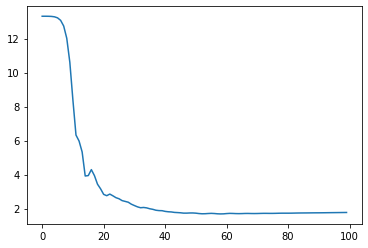

In [ ]:
plt.plot(test_rmse_list1)

In [ ]:
model2 = PMF(train_R = train_R, test_R = test_R, constrain= False)
U2, V2, tr_loss_list2, test_rmse_list2 = model2.train(test_data)
preds = model2.predict(test_data=test_data)
print(13)

traning iteration: 0 ,loss: 538577.287554, test_rmse: 13.319641
traning iteration: 1 ,loss: 537852.871696, test_rmse: 13.320115
traning iteration: 2 ,loss: 536809.280583, test_rmse: 13.320507
traning iteration: 3 ,loss: 535403.484180, test_rmse: 13.319209
traning iteration: 4 ,loss: 533479.903627, test_rmse: 13.312332
traning iteration: 5 ,loss: 530695.928386, test_rmse: 13.292045
traning iteration: 6 ,loss: 526383.804258, test_rmse: 13.243346
traning iteration: 7 ,loss: 519286.956248, test_rmse: 13.137734
traning iteration: 8 ,loss: 507101.480999, test_rmse: 12.921896
traning iteration: 9 ,loss: 485852.278884, test_rmse: 12.501542
traning iteration: 10 ,loss: 449665.011254, test_rmse: 11.732372
traning iteration: 11 ,loss: 393200.890857, test_rmse: 10.470139
traning iteration: 12 ,loss: 321453.256028, test_rmse: 8.794658
traning iteration: 13 ,loss: 263387.080070, test_rmse: 7.352970
traning iteration: 14 ,loss: 246386.607453, test_rmse: 6.836280
traning iteration: 15 ,loss: 225991.35

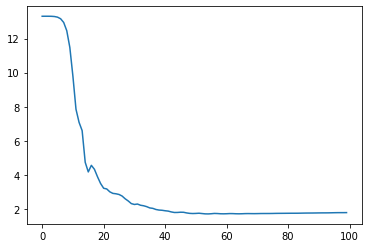

In [ ]:
plt.plot(test_rmse_list2)

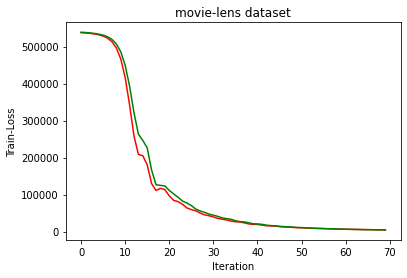

In [ ]:
plt.plot(tr_loss_list1, 'r')

plt.plot(tr_loss_list2, 'g')
plt.title('movie-lens dataset')
plt.xlabel('Iteration')
plt.ylabel('Train-Loss')

plt.show()

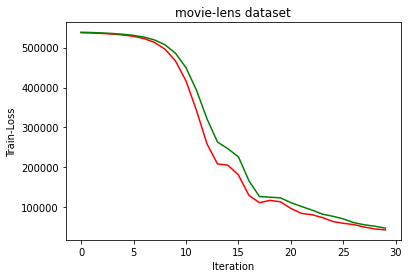

In [ ]:
plt.plot(tr_loss_list1[:30], 'r')

plt.plot(tr_loss_list2[:30], 'g')
plt.title('movie-lens dataset')
plt.xlabel('Iteration')
plt.ylabel('Train-Loss')

plt.show()

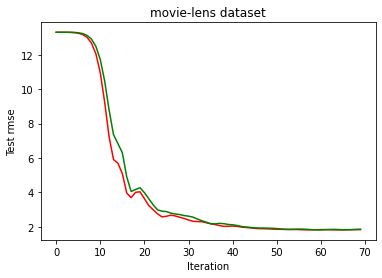

In [ ]:
plt.plot(test_rmse_list1, 'r')

plt.plot(test_rmse_list2, 'g')
plt.title('movie-lens dataset')
plt.xlabel('Iteration')
plt.ylabel('Test rmse')
plt.show()